### WHAT ARE WE PREDICTING?
We are predicting the natural log of the sum of all transactions per user.

### DATA FIELDS<br>
**fullVisitorId** - A unique identifier for each user of the Google Merchandise Store.<br><br>
**channelGrouping** - The channel via which the user came to the Store.<br><br>
**date** - The date on which the user visited the Store.<br><br>
**device** - The specifications for the device used to access the Store.<br><br>
**geoNetwork** - This section contains information about the geography of the user.<br><br>
**socialEngagementType** - Engagement type, either "Socially Engaged" or "Not Socially Engaged".<br><br>
**totals** - This section contains aggregate values across the session.<br><br>
**trafficSource** - This section contains information about the Traffic Source from which the session originated.<br><br>
**visitId** - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.<br><br>
**visitNumber** - The session number for this user. If this is the first session, then this is set to 1.<br><br>
**visitStartTime** - The timestamp (expressed as POSIX time).<br><br>
**hits** - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.<br><br>
**customDimensions** - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.<br><br>
**totals** - This set of columns mostly includes high-level aggregate data.<br><br>


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from pandas.io.json import json_normalize

In [2]:
def load_df(csv_path='/Users/kevinmacmat/Desktop/google_analytics_kaggle/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [3]:
df = load_df()

/Users/kevinmacmat/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


Loaded train.csv. Shape: (903653, 55)


In [4]:
# convert date to date time & set date as index
df.date = pd.to_datetime(df.date, format='%Y%m%d')
df.set_index(df.date, inplace=True)

In [5]:
# drop columns not available in demo dataset
drop_columns = [
    'device.browserVersion','device.browserSize','device.operatingSystemVersion',
    'device.mobileDeviceBranding','device.mobileDeviceModel','device.mobileInputSelector',
    'device.mobileDeviceInfo','device.mobileDeviceMarketingName','device.flashVersion',
    'device.language','device.screenColors','device.screenResolution','geoNetwork.cityId',
    'geoNetwork.latitude','geoNetwork.longitude','geoNetwork.networkLocation',
    'trafficSource.adwordsClickInfo.criteriaParameters']

df.drop(columns=drop_columns, inplace=True)

In [6]:
# convert nan(float) values to 0
df = df.fillna({'totals.hits': 0,'totals.pageviews': 0,'totals.bounces': 0,
                'totals.newVisits': 0,'totals.transactionRevenue': 0})
# convert numeric strings to integers
df = df.astype({'totals.hits': 'int64','totals.pageviews': 'int64','totals.bounces': 'int64',
                'totals.newVisits': 'int64','totals.transactionRevenue': 'int64'}, errors='raise')

In [7]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,...,trafficSource.keyword,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
date,,,,,,,,,,,,,,,,,,,,,
2016-09-02,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,Windows,...,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-02,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,Macintosh,...,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-02,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,Windows,...,(not provided),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-02,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,Linux,...,google + online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-02,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,Android,...,(not provided),True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 903653 entries, 2016-09-02 to 2017-01-04
Data columns (total 38 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   channelGrouping                               903653 non-null  object        
 1   date                                          903653 non-null  datetime64[ns]
 2   fullVisitorId                                 903653 non-null  object        
 3   sessionId                                     903653 non-null  object        
 4   socialEngagementType                          903653 non-null  object        
 5   visitId                                       903653 non-null  int64         
 6   visitNumber                                   903653 non-null  int64         
 7   visitStartTime                                903653 non-null  int64         
 8   device.browser                        

In [9]:
df.describe()

,visitId,visitNumber,visitStartTime,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue
count,9.036530e+05,903653.000000,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,9.036530e+05
mean,1.485007e+09,2.264897,1.485007e+09,4.596538,3.849338,0.498676,0.778020,1.704273e+06
std,9.022124e+06,9.283735,9.022124e+06,9.641437,7.025002,0.499999,0.415578,5.277866e+07
min,1.470035e+09,1.000000,1.470035e+09,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.477561e+09,1.000000,1.477561e+09,1.000000,1.000000,0.000000,1.000000,0.000000e+00
50%,1.483949e+09,1.000000,1.483949e+09,2.000000,1.000000,0.000000,1.000000,0.000000e+00
75%,1.492759e+09,1.000000,1.492759e+09,4.000000,4.000000,1.000000,1.000000,0.000000e+00
max,1.501657e+09,395.000000,1.501657e+09,500.000000,469.000000,1.000000,1.000000,2.312950e+10


In [11]:
# df with sum of all transactions per user.
gdf = df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

In [26]:
# natural log of the sum of all transactions per user
transaction_sum_log = np.log1p(gdf['totals.transactionRevenue'].values)
# number of users range for x axis
user_range = range(gdf.shape[0])

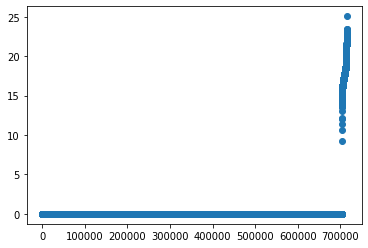

In [52]:
# np.sort to see which 
plt.scatter(user_range, np.sort(transaction_sum_log))
plt.show()

In [90]:
check = []
for x in transaction_sum_log:
    if (x == 0):
        check.append(x)
print('{} {}'.format('NON-ZERO VALUES:', gdf.shape[0] - int(len(check))))

NON-ZERO VALUES: 9996
